In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SP500_df = pd.read_pickle("SP500_df_exploration.pkl")
RD5F_df = pd.read_pickle("RD5F_df_exploration.pkl")
STIP_df = pd.read_pickle("STIP_df_exploration.pkl")
MF_df = pd.read_pickle("MF_df_exploration.pkl")

# Combine training data

In [3]:
print(SP500_df["Date"].count())
print(RD5F_df["Date"].count())
print(STIP_df["Date"].count())
print(MF_df["Date"].count())

10078
15481
51802
25800


In [4]:
print(SP500_df["Date"].duplicated().sum())
print(RD5F_df["Date"].duplicated().sum())
print(STIP_df["Date"].duplicated().sum())
print(MF_df["Date"].duplicated().sum())

0
0
25901
0


In [5]:
STIP_df = STIP_df.drop_duplicates(subset="Date")

In [6]:
merged_df = SP500_df.merge(RD5F_df, on="Date", how="inner").merge(STIP_df, on="Date", how="inner").merge(MF_df, on="Date", how="inner")

In [7]:
merged_df

,Date,Close,High,Low,Open,Volume,Mkt-RF,SMB,HML,RMW,...,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other,Momentum
0,1986-01-02,209.589996,211.279999,208.929993,211.279999,98960000,-0.63,0.88,0.39,-0.41,...,-0.08,-0.62,-1.22,-0.06,0.11,-0.23,-0.93,-0.43,-0.52,-0.72
1,1986-01-03,210.880005,210.880005,209.509995,209.589996,105000000,0.56,-0.08,0.21,-0.13,...,1.05,-0.08,0.79,0.65,0.45,0.63,0.11,0.66,0.39,0.01
2,1986-01-06,210.649994,210.979996,209.929993,210.880005,99610000,-0.04,0.04,0.10,-0.22,...,-0.28,-0.17,-0.09,-0.21,-0.31,0.25,-0.41,0.11,-0.02,0.00
3,1986-01-07,213.800003,213.800003,210.649994,210.649994,153000000,1.38,-0.48,0.06,-0.28,...,1.06,1.45,1.28,1.52,1.15,1.65,1.34,1.65,1.29,-0.03
4,1986-01-08,207.970001,214.570007,207.490005,213.800003,180300000,-2.16,1.43,0.33,-0.08,...,-1.86,-1.19,-2.95,-2.78,-2.21,-1.32,-2.55,-1.64,-2.03,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,1.11,-0.12,-0.05,-0.13,...,0.98,1.06,0.98,5.77,0.86,0.68,1.63,1.14,0.99,0.67
9824,2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,0.02,1.09,-0.19,-0.44,...,0.23,-0.22,0.23,-1.33,0.29,-0.36,-0.17,0.35,0.00,0.01
9825,2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000,-1.17,-0.44,0.56,0.41,...,-1.38,-1.30,-1.41,-3.87,-0.58,-0.30,-1.24,-0.91,-1.21,-0.88
9826,2024-12-30,5906.939941,5940.790039,5869.160156,5920.669922,3433250000,-1.09,0.24,0.74,0.55,...,-1.14,-1.10,-0.89,-2.74,-0.96,-0.17,-1.25,-0.84,-1.18,0.06


# Create target variable "Direction"

In [8]:
merged_df[1:3]["Close"]

1    210.880005
2    210.649994
Name: Close, dtype: float64

In [9]:
diff = merged_df["Close"].shift(-1) - merged_df["Close"]

# If it's greater than 0, it's a 1. 
# If it's 0 or negative, it's a 0.
merged_df["Direction"] = (diff > 0).astype(int)

merged_df["Direction"].value_counts().sort_index()

Direction
0    4532
1    5296
Name: count, dtype: int64

In [10]:
print(5296 / (5296 + 4532))

0.5388685388685389


In [11]:
merged_df

,Date,Close,High,Low,Open,Volume,Mkt-RF,SMB,HML,RMW,...,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other,Momentum,Direction
0,1986-01-02,209.589996,211.279999,208.929993,211.279999,98960000,-0.63,0.88,0.39,-0.41,...,-0.62,-1.22,-0.06,0.11,-0.23,-0.93,-0.43,-0.52,-0.72,1
1,1986-01-03,210.880005,210.880005,209.509995,209.589996,105000000,0.56,-0.08,0.21,-0.13,...,-0.08,0.79,0.65,0.45,0.63,0.11,0.66,0.39,0.01,0
2,1986-01-06,210.649994,210.979996,209.929993,210.880005,99610000,-0.04,0.04,0.10,-0.22,...,-0.17,-0.09,-0.21,-0.31,0.25,-0.41,0.11,-0.02,0.00,1
3,1986-01-07,213.800003,213.800003,210.649994,210.649994,153000000,1.38,-0.48,0.06,-0.28,...,1.45,1.28,1.52,1.15,1.65,1.34,1.65,1.29,-0.03,0
4,1986-01-08,207.970001,214.570007,207.490005,213.800003,180300000,-2.16,1.43,0.33,-0.08,...,-1.19,-2.95,-2.78,-2.21,-1.32,-2.55,-1.64,-2.03,0.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,1.11,-0.12,-0.05,-0.13,...,1.06,0.98,5.77,0.86,0.68,1.63,1.14,0.99,0.67,0
9824,2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,0.02,1.09,-0.19,-0.44,...,-0.22,0.23,-1.33,0.29,-0.36,-0.17,0.35,0.00,0.01,0
9825,2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000,-1.17,-0.44,0.56,0.41,...,-1.30,-1.41,-3.87,-0.58,-0.30,-1.24,-0.91,-1.21,-0.88,0
9826,2024-12-30,5906.939941,5940.790039,5869.160156,5920.669922,3433250000,-1.09,0.24,0.74,0.55,...,-1.10,-0.89,-2.74,-0.96,-0.17,-1.25,-0.84,-1.18,0.06,0


# Compare price change %

In [12]:
relative_col = ["Close", "High", "Low", "Open", "Volume"]

In [13]:
cols_to_fix = ["Close", "High", "Low", "Open", "Volume"]
for col in cols_to_fix:
    merged_df[f"{col}_pct"] = merged_df[col].pct_change()

In [14]:
merged_df.head()

,Date,Close,High,Low,Open,Volume,Mkt-RF,SMB,HML,RMW,...,Rtail,Finan,Other,Momentum,Direction,Close_pct,High_pct,Low_pct,Open_pct,Volume_pct
0,1986-01-02,209.589996,211.279999,208.929993,211.279999,98960000,-0.63,0.88,0.39,-0.41,...,-0.93,-0.43,-0.52,-0.72,1,NaN,NaN,NaN,NaN,NaN
1,1986-01-03,210.880005,210.880005,209.509995,209.589996,105000000,0.56,-0.08,0.21,-0.13,...,0.11,0.66,0.39,0.01,0,0.006155,-0.001893,0.002776,-0.007999,0.061035
2,1986-01-06,210.649994,210.979996,209.929993,210.880005,99610000,-0.04,0.04,0.10,-0.22,...,-0.41,0.11,-0.02,0.00,1,-0.001091,0.000474,0.002005,0.006155,-0.051333
3,1986-01-07,213.800003,213.800003,210.649994,210.649994,153000000,1.38,-0.48,0.06,-0.28,...,1.34,1.65,1.29,-0.03,0,0.014954,0.013366,0.003430,-0.001091,0.535990
4,1986-01-08,207.970001,214.570007,207.490005,213.800003,180300000,-2.16,1.43,0.33,-0.08,...,-2.55,-1.64,-2.03,0.15,0,-0.027268,0.003602,-0.015001,0.014954,0.178431


# Price movement in a single day

In [15]:
merged_df["Daily_Range"] = (merged_df["High"] - merged_df["Low"]) / merged_df["Open"]

In [16]:
merged_df.head()

,Date,Close,High,Low,Open,Volume,Mkt-RF,SMB,HML,RMW,...,Finan,Other,Momentum,Direction,Close_pct,High_pct,Low_pct,Open_pct,Volume_pct,Daily_Range
0,1986-01-02,209.589996,211.279999,208.929993,211.279999,98960000,-0.63,0.88,0.39,-0.41,...,-0.43,-0.52,-0.72,1,NaN,NaN,NaN,NaN,NaN,0.011123
1,1986-01-03,210.880005,210.880005,209.509995,209.589996,105000000,0.56,-0.08,0.21,-0.13,...,0.66,0.39,0.01,0,0.006155,-0.001893,0.002776,-0.007999,0.061035,0.006537
2,1986-01-06,210.649994,210.979996,209.929993,210.880005,99610000,-0.04,0.04,0.10,-0.22,...,0.11,-0.02,0.00,1,-0.001091,0.000474,0.002005,0.006155,-0.051333,0.004979
3,1986-01-07,213.800003,213.800003,210.649994,210.649994,153000000,1.38,-0.48,0.06,-0.28,...,1.65,1.29,-0.03,0,0.014954,0.013366,0.003430,-0.001091,0.535990,0.014954
4,1986-01-08,207.970001,214.570007,207.490005,213.800003,180300000,-2.16,1.43,0.33,-0.08,...,-1.64,-2.03,0.15,0,-0.027268,0.003602,-0.015001,0.014954,0.178431,0.033115


# Rearrange columns

In [17]:
front_cols = ["Date", "Direction", "Close_pct", "High_pct", "Low_pct", "Open_pct", "Volume_pct", "Daily_Range"]

remaining_cols = [c for c in merged_df.columns if c not in front_cols]

merged_df = merged_df[front_cols + remaining_cols]

merged_df = merged_df.drop(columns=["Close", "High", "Low", "Open", "Volume"])

merged_df.head()

,Date,Direction,Close_pct,High_pct,Low_pct,Open_pct,Volume_pct,Daily_Range,Mkt-RF,SMB,...,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other,Momentum
0,1986-01-02,1,NaN,NaN,NaN,NaN,NaN,0.011123,-0.63,0.88,...,-0.08,-0.62,-1.22,-0.06,0.11,-0.23,-0.93,-0.43,-0.52,-0.72
1,1986-01-03,0,0.006155,-0.001893,0.002776,-0.007999,0.061035,0.006537,0.56,-0.08,...,1.05,-0.08,0.79,0.65,0.45,0.63,0.11,0.66,0.39,0.01
2,1986-01-06,1,-0.001091,0.000474,0.002005,0.006155,-0.051333,0.004979,-0.04,0.04,...,-0.28,-0.17,-0.09,-0.21,-0.31,0.25,-0.41,0.11,-0.02,0.00
3,1986-01-07,0,0.014954,0.013366,0.003430,-0.001091,0.535990,0.014954,1.38,-0.48,...,1.06,1.45,1.28,1.52,1.15,1.65,1.34,1.65,1.29,-0.03
4,1986-01-08,0,-0.027268,0.003602,-0.015001,0.014954,0.178431,0.033115,-2.16,1.43,...,-1.86,-1.19,-2.95,-2.78,-2.21,-1.32,-2.55,-1.64,-2.03,0.15


In [18]:
merged_df.columns

Index(['Date', 'Direction', 'Close_pct', 'High_pct', 'Low_pct', 'Open_pct',
       'Volume_pct', 'Daily_Range', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
       'Food', 'Mines', 'Oil', 'Clths', 'Durbl', 'Chems', 'Cnsum', 'Cnstr',
       'Steel', 'FabPr', 'Machn', 'Cars', 'Trans', 'Utils', 'Rtail', 'Finan',
       'Other', 'Momentum'],
      dtype='str')

# Remove first row due to NaN pct values and last row due to not being able to calculate future direction

In [19]:
merged_df = merged_df.iloc[1:-1]
merged_df

,Date,Direction,Close_pct,High_pct,Low_pct,Open_pct,Volume_pct,Daily_Range,Mkt-RF,SMB,...,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other,Momentum
1,1986-01-03,0,0.006155,-0.001893,0.002776,-0.007999,0.061035,0.006537,0.56,-0.08,...,1.05,-0.08,0.79,0.65,0.45,0.63,0.11,0.66,0.39,0.01
2,1986-01-06,1,-0.001091,0.000474,0.002005,0.006155,-0.051333,0.004979,-0.04,0.04,...,-0.28,-0.17,-0.09,-0.21,-0.31,0.25,-0.41,0.11,-0.02,0.00
3,1986-01-07,0,0.014954,0.013366,0.003430,-0.001091,0.535990,0.014954,1.38,-0.48,...,1.06,1.45,1.28,1.52,1.15,1.65,1.34,1.65,1.29,-0.03
4,1986-01-08,0,-0.027268,0.003602,-0.015001,0.014954,0.178431,0.033115,-2.16,1.43,...,-1.86,-1.19,-2.95,-2.78,-2.21,-1.32,-2.55,-1.64,-2.03,0.15
5,1986-01-09,0,-0.008944,-0.030759,-0.014362,-0.027268,-0.021076,0.016637,-1.17,-0.79,...,-1.25,-1.57,-0.38,-0.58,-0.72,-1.89,-1.21,-1.54,-1.49,-0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,2024-12-23,1,0.007287,-0.000637,0.012048,0.016818,-0.563032,0.012740,0.61,-0.85,...,0.40,-0.27,2.53,1.65,0.32,0.48,-0.39,0.31,0.24,-0.08
9823,2024-12-24,0,0.011043,0.010346,0.013362,0.007471,-0.510831,0.009802,1.11,-0.12,...,0.98,1.06,0.98,5.77,0.86,0.68,1.63,1.14,0.99,0.67
9824,2024-12-26,0,-0.000406,0.001598,0.004335,0.006741,0.652442,0.007034,0.02,1.09,...,0.23,-0.22,0.23,-1.33,0.29,-0.36,-0.17,0.35,0.00,0.01
9825,2024-12-27,0,-0.011056,-0.007204,-0.012388,-0.003120,0.087821,0.012191,-1.17,-0.44,...,-1.38,-1.30,-1.41,-3.87,-0.58,-0.30,-1.24,-0.91,-1.21,-0.88


# Add date information

In [20]:
merged_df["Month"] = merged_df["Date"].dt.month
merged_df["DayOfWeek"] = merged_df["Date"].dt.dayofweek
merged_df["DayOfMonth"] = merged_df["Date"].dt.day
merged_df["Quarter"] = merged_df["Date"].dt.quarter

merged_df.set_index("Date", inplace=True)

merged_df.head()

,Direction,Close_pct,High_pct,Low_pct,Open_pct,Volume_pct,Daily_Range,Mkt-RF,SMB,HML,...,Trans,Utils,Rtail,Finan,Other,Momentum,Month,DayOfWeek,DayOfMonth,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
1986-01-03,0,0.006155,-0.001893,0.002776,-0.007999,0.061035,0.006537,0.56,-0.08,0.21,...,0.45,0.63,0.11,0.66,0.39,0.01,1,4,3,1
1986-01-06,1,-0.001091,0.000474,0.002005,0.006155,-0.051333,0.004979,-0.04,0.04,0.10,...,-0.31,0.25,-0.41,0.11,-0.02,0.00,1,0,6,1
1986-01-07,0,0.014954,0.013366,0.003430,-0.001091,0.535990,0.014954,1.38,-0.48,0.06,...,1.15,1.65,1.34,1.65,1.29,-0.03,1,1,7,1
1986-01-08,0,-0.027268,0.003602,-0.015001,0.014954,0.178431,0.033115,-2.16,1.43,0.33,...,-2.21,-1.32,-2.55,-1.64,-2.03,0.15,1,2,8,1
1986-01-09,0,-0.008944,-0.030759,-0.014362,-0.027268,-0.021076,0.016637,-1.17,-0.79,-0.13,...,-0.72,-1.89,-1.21,-1.54,-1.49,-0.53,1,3,9,1


# Feature Selection

In [21]:
merged_df.columns

Index(['Direction', 'Close_pct', 'High_pct', 'Low_pct', 'Open_pct',
       'Volume_pct', 'Daily_Range', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
       'Food', 'Mines', 'Oil', 'Clths', 'Durbl', 'Chems', 'Cnsum', 'Cnstr',
       'Steel', 'FabPr', 'Machn', 'Cars', 'Trans', 'Utils', 'Rtail', 'Finan',
       'Other', 'Momentum', 'Month', 'DayOfWeek', 'DayOfMonth', 'Quarter'],
      dtype='str')

In [22]:
corr_matrix = merged_df.corr().abs()

<Axes: >

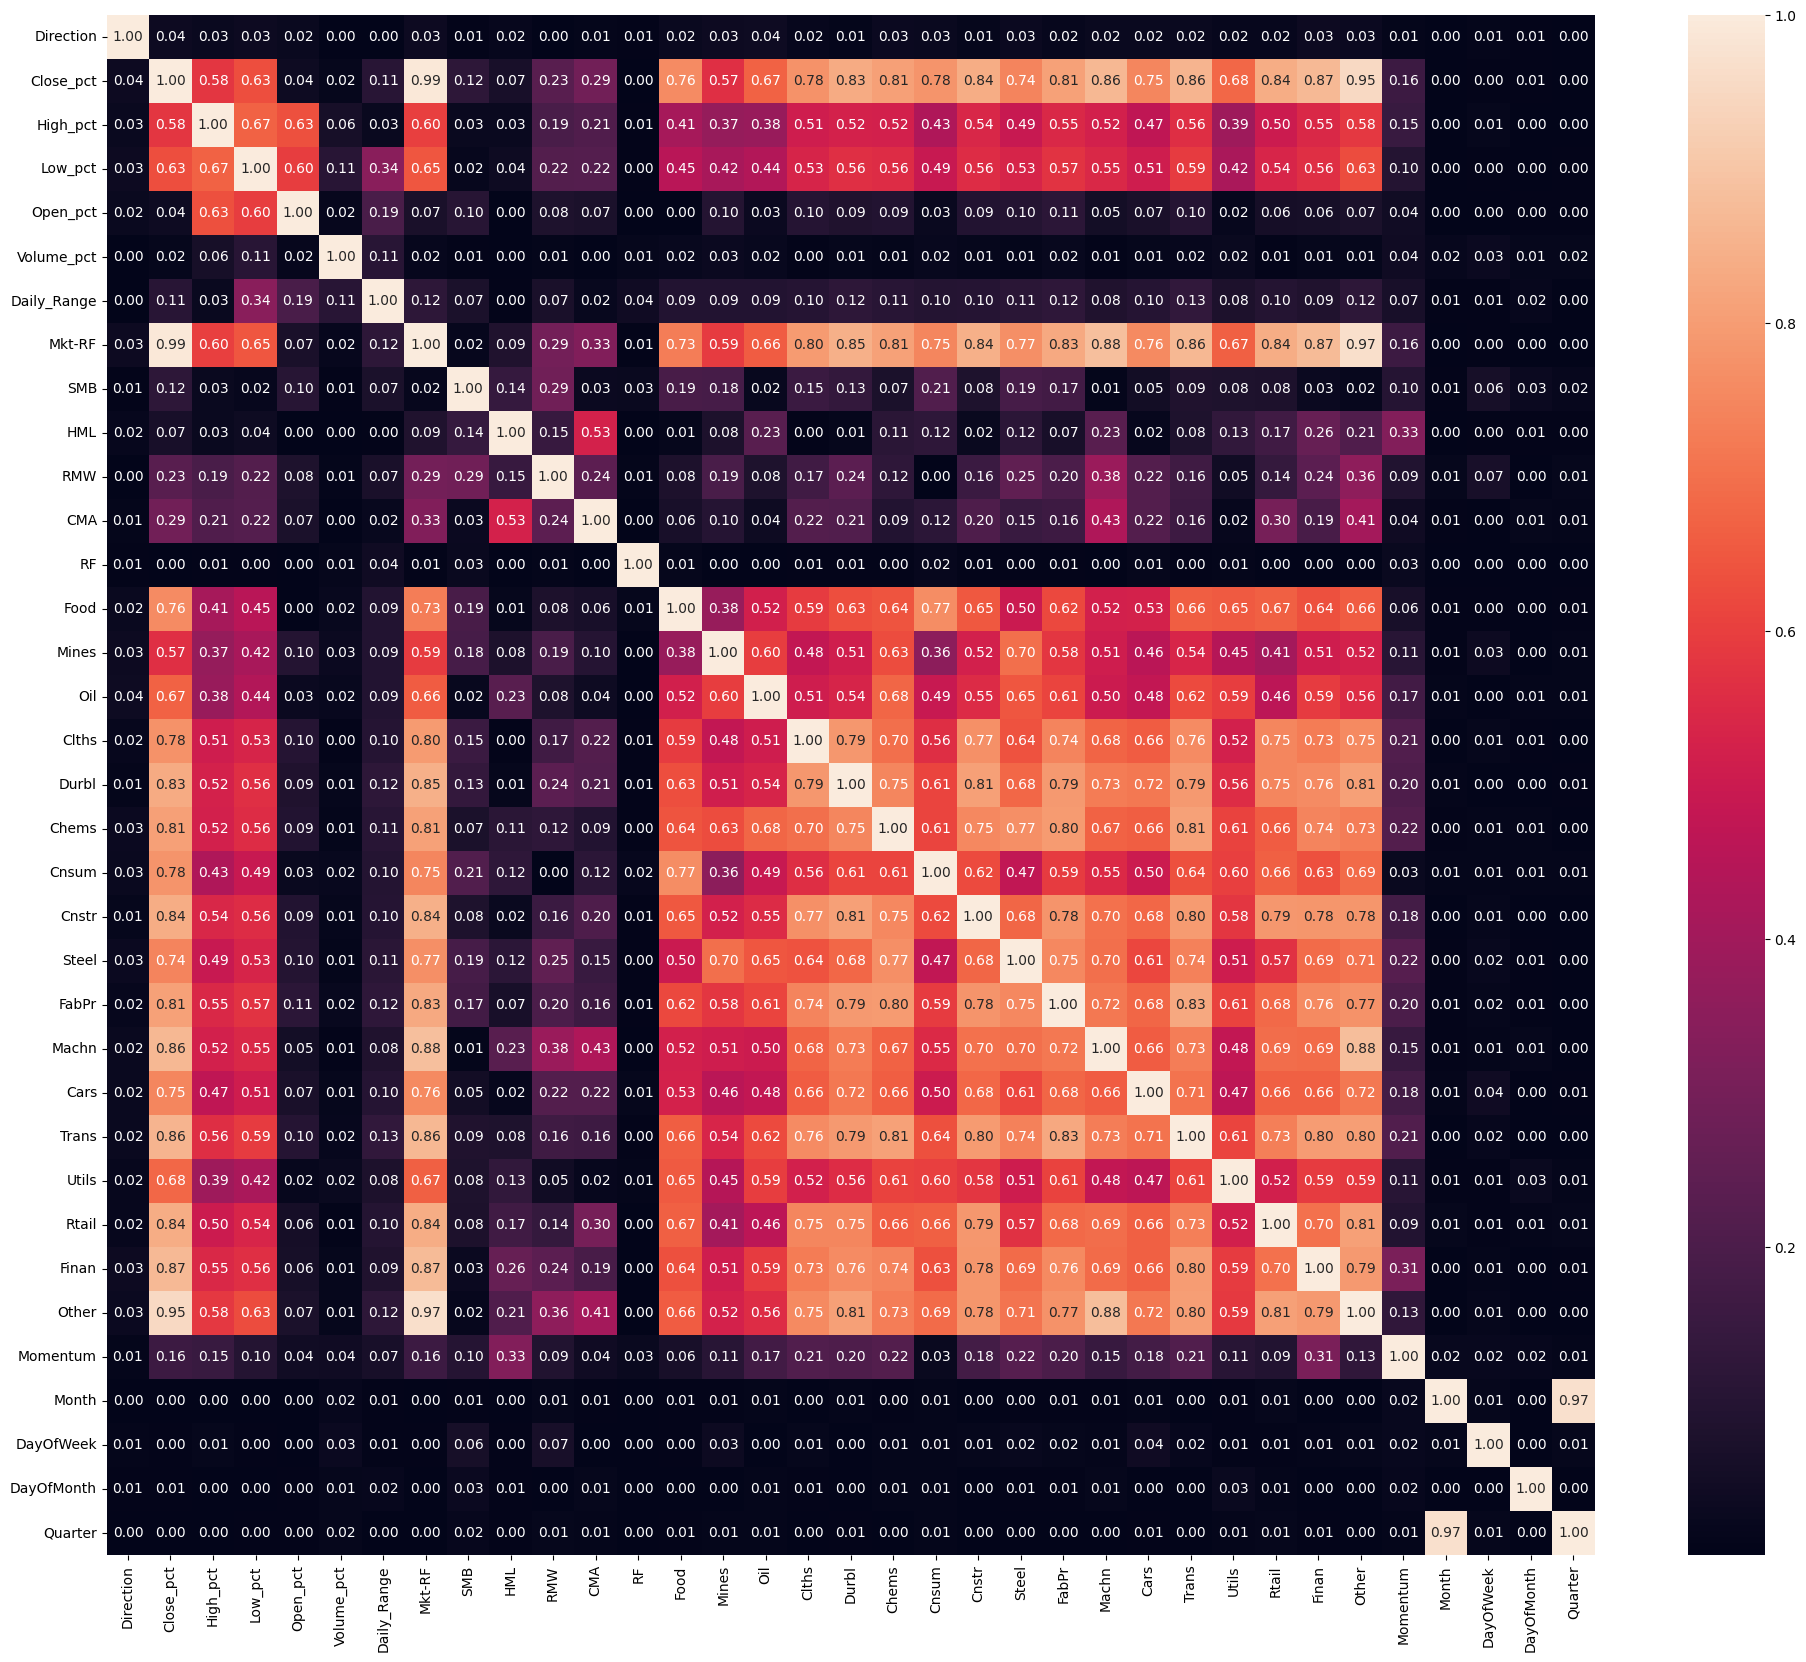

In [23]:
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

In [24]:
# Sort it to see the strongest connections
sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

# Filter out the 1.0s (columns correlated with themselves) and show the top 20 relationships
top_correlations = sorted_corr[sorted_corr < 1].head(20)

print(top_correlations)

Close_pct  Mkt-RF       0.990831
Mkt-RF     Close_pct    0.990831
Month      Quarter      0.971072
Quarter    Month        0.971072
Mkt-RF     Other        0.967060
Other      Mkt-RF       0.967060
           Close_pct    0.950072
Close_pct  Other        0.950072
Mkt-RF     Machn        0.884611
Machn      Mkt-RF       0.884611
Other      Machn        0.880269
Machn      Other        0.880269
Mkt-RF     Finan        0.874992
Finan      Mkt-RF       0.874992
Close_pct  Finan        0.870121
Finan      Close_pct    0.870121
Trans      Mkt-RF       0.864454
Mkt-RF     Trans        0.864454
Machn      Close_pct    0.863842
Close_pct  Machn        0.863842
dtype: float64


In [25]:
# Drop highly correlated columns, Mkt-RF, Quarter, Other
merged_df = merged_df.drop(columns=["Mkt-RF", "Quarter", "Other"])

# Seperate data into X and y

In [26]:
X = merged_df.drop(columns=["Direction"])
X

,Close_pct,High_pct,Low_pct,Open_pct,Volume_pct,Daily_Range,SMB,HML,RMW,CMA,...,Machn,Cars,Trans,Utils,Rtail,Finan,Momentum,Month,DayOfWeek,DayOfMonth
Date,,,,,,,,,,,,,,,,,,,,,
1986-01-03,0.006155,-0.001893,0.002776,-0.007999,0.061035,0.006537,-0.08,0.21,-0.13,0.29,...,0.79,0.65,0.45,0.63,0.11,0.66,0.01,1,4,3
1986-01-06,-0.001091,0.000474,0.002005,0.006155,-0.051333,0.004979,0.04,0.10,-0.22,-0.04,...,-0.09,-0.21,-0.31,0.25,-0.41,0.11,0.00,1,0,6
1986-01-07,0.014954,0.013366,0.003430,-0.001091,0.535990,0.014954,-0.48,0.06,-0.28,-0.02,...,1.28,1.52,1.15,1.65,1.34,1.65,-0.03,1,1,7
1986-01-08,-0.027268,0.003602,-0.015001,0.014954,0.178431,0.033115,1.43,0.33,-0.08,0.13,...,-2.95,-2.78,-2.21,-1.32,-2.55,-1.64,0.15,1,2,8
1986-01-09,-0.008944,-0.030759,-0.014362,-0.027268,-0.021076,0.016637,-0.79,-0.13,0.04,-0.20,...,-0.38,-0.58,-0.72,-1.89,-1.21,-1.54,-0.53,1,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.007287,-0.000637,0.012048,0.016818,-0.563032,0.012740,-0.85,-0.19,0.28,0.66,...,2.53,1.65,0.32,0.48,-0.39,0.31,-0.08,12,0,23
2024-12-24,0.011043,0.010346,0.013362,0.007471,-0.510831,0.009802,-0.12,-0.05,-0.13,-0.37,...,0.98,5.77,0.86,0.68,1.63,1.14,0.67,12,1,24
2024-12-26,-0.000406,0.001598,0.004335,0.006741,0.652442,0.007034,1.09,-0.19,-0.44,0.35,...,0.23,-1.33,0.29,-0.36,-0.17,0.35,0.01,12,3,26


In [27]:
X.columns

Index(['Close_pct', 'High_pct', 'Low_pct', 'Open_pct', 'Volume_pct',
       'Daily_Range', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Food', 'Mines', 'Oil',
       'Clths', 'Durbl', 'Chems', 'Cnsum', 'Cnstr', 'Steel', 'FabPr', 'Machn',
       'Cars', 'Trans', 'Utils', 'Rtail', 'Finan', 'Momentum', 'Month',
       'DayOfWeek', 'DayOfMonth'],
      dtype='str')

In [28]:
y = merged_df["Direction"]
y

Date
1986-01-03    0
1986-01-06    1
1986-01-07    0
1986-01-08    0
1986-01-09    0
             ..
2024-12-23    1
2024-12-24    0
2024-12-26    0
2024-12-27    0
2024-12-30    0
Name: Direction, Length: 9826, dtype: int64

### to pickle

In [29]:
X.to_pickle("X_preprocessing")
y.to_pickle("y_preprocessing")